# Check-out the simulation quality

In [1]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt

import customer_probs_matrix

plt.rcParams['figure.figsize'] = (14,6)

In [2]:
def read_csv(df_names):
    '''
    Reads the csvs one by one and retrives them sorted with the customer number for each day and the timestamp.  
    Adds an extra column for unique customer id produced by shopping day info and daily customer no.
    '''
    df = pd.DataFrame()
    for df_name in df_names:
        df_day = pd.read_csv(f'/Users/gulcinvardar/Desktop/Data_Science_Bootcamp/stationary-sriracha-student-code/projects/week_8/customer_data/{df_name}.csv', sep = ';', parse_dates=True).sort_values(['customer_no', 'timestamp']).set_index('timestamp')
        df_day['shopping_day'] = df_name [0:2]
        df = pd.concat([df, df_day])
        df['customer_id'] = df['shopping_day'] + '_' + df['customer_no'].astype('str')
        df['next_location'] = df['location'].shift(-1)

    return df

In [3]:
def ave_cus_locations(df):
    df_eda = df.groupby(['timestamp', 'location'])['customer_id'].count().reset_index().melt(['location', 'timestamp']).set_index('timestamp')
    df_eda.index = pd.DatetimeIndex(df_eda.index)
    df_eda['day'] = df_eda.index.day
    df_eda['hour'] = df_eda.index.hour

    return df_eda


In [4]:
def cus_checkout(df):
    df_checkout = df[df['location'] == 'checkout']
    ax_checkout = sns.lineplot(data = df_checkout, x=df_checkout['hour'], y=df_checkout['value'])
    ax_checkout.set(xlabel='time (h)', ylabel='customer number')

    return ax_checkout

In [5]:
def cus_sections(df):
    df_sections = df[df['location'] != 'checkout'].reset_index()
    ax_sections = sns.lineplot(data = df_sections, x=df_sections['hour'], y=df_sections['value'], hue = df_sections['location'])
    ax_sections.set(xlabel='time (h)', ylabel='customer number')

    
    

In [6]:
def modify_df(df):
    df_path = pd.DataFrame(df.groupby(['location', 'next_location'])['customer_id'].count())

    return df_path
    

In [7]:
def location_first(df):
    ax = df["customer_id"].unstack().drop(['spices', 'fruit', 'drinks', 'dairy']).plot.bar()
    plt.xlabel('first_section')
    ax.axes.xaxis.set_ticks([])

    return ax

In [8]:
def location_next(df):
    ax = df["customer_id"].unstack().drop('checkout').plot.bar()

    return ax
    

In [9]:
def calculate_time_spent(df):
    df.index = pd.DatetimeIndex(df.index)
    df['duration_min'] = df.index.to_series().diff().shift(-1)
    df['duration_min'] = df['duration_min'].dt.seconds.div(60, fill_value=0)
    df_dur = pd.DataFrame(df.groupby(['location'])['duration_min'].mean()).iloc[1:]

    return df_dur


In [10]:
def plot_time_spent(df):
    ax = df["duration_min"].plot.bar()
    plt.ylabel('average time spent (min)')

    return ax

### Analyze the average number of customers at the checkout and teh other sections

`Analyze the real data`

In [11]:
df_all = customer_probs_matrix.df_all
df_all

,customer_no,location,shopping_day,customer_id,next_location
timestamp,,,,,
2019-09-02 07:03:00,1,dairy,mo,mo_1,checkout
2019-09-02 07:05:00,1,checkout,mo,mo_1,dairy
2019-09-02 07:03:00,2,dairy,mo,mo_2,checkout
2019-09-02 07:06:00,2,checkout,mo,mo_2,dairy
2019-09-02 07:04:00,3,dairy,mo,mo_3,checkout
...,...,...,...,...,...
2019-09-06 21:48:00,1504,checkout,fr,fr_1504,fruit
2019-09-06 21:48:00,1507,dairy,fr,fr_1507,checkout
2019-09-06 21:50:00,1507,checkout,fr,fr_1507,dairy


In [12]:
df_eda = ave_cus_locations(df_all)

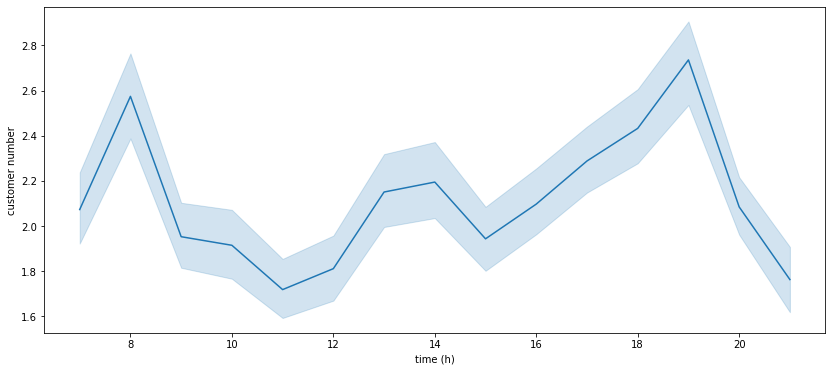

In [13]:
ax_checkout = cus_checkout(df_eda)

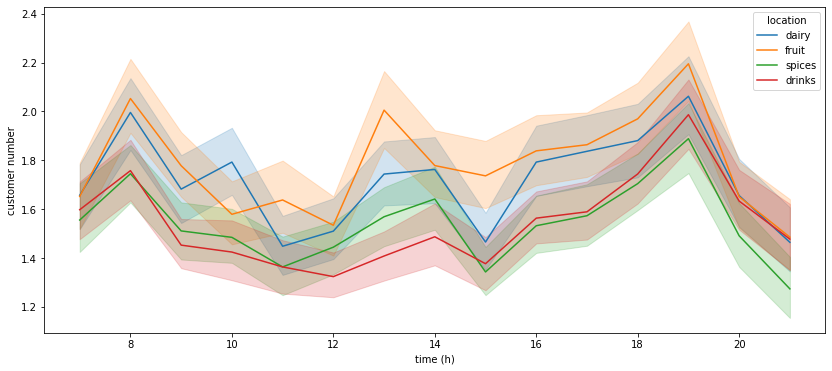

In [14]:
ax_sections = cus_sections(df_eda)

`Analyze the simulation results`

In [15]:
df_names = ['customer_simulation']
df_sim = read_csv(df_names)
df_all_sim= customer_probs_matrix.clean_data(df_sim)
df_all_sim

,customer_no,location,shopping_day,customer_id,next_location
timestamp,,,,,
2022-05-04 07:02:00,1,dairy,cu,cu_1,spices
2022-05-04 07:04:00,1,spices,cu,cu_1,fruit
2022-05-04 07:06:00,1,fruit,cu,cu_1,checkout
2022-05-04 07:08:00,1,checkout,cu,cu_1,drinks
2022-05-04 07:02:00,2,drinks,cu,cu_2,checkout
...,...,...,...,...,...
2022-05-04 21:54:00,690,checkout,cu,cu_690,drinks
2022-05-04 21:56:00,693,dairy,cu,cu_693,checkout
2022-05-04 21:58:00,693,checkout,cu,cu_693,fruit


In [16]:
df_eda_sim = ave_cus_locations(df_all_sim)

`Compare the real and the simulation`

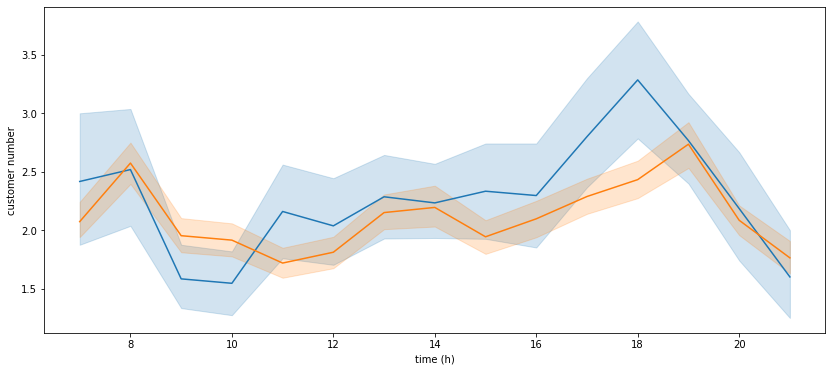

In [17]:
ax_checkout_sim = cus_checkout(df_eda_sim)
ax_checkout = cus_checkout(df_eda)

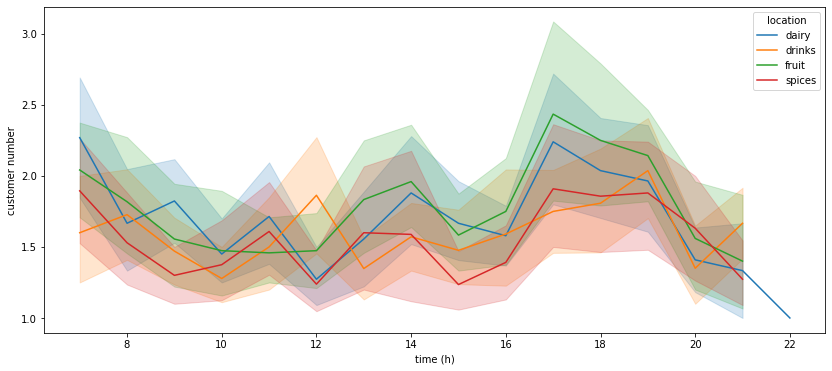

In [18]:
ax_sections_sim = cus_sections(df_eda_sim)

### Analyze the transition

In [19]:
df_path = modify_df(df_all)

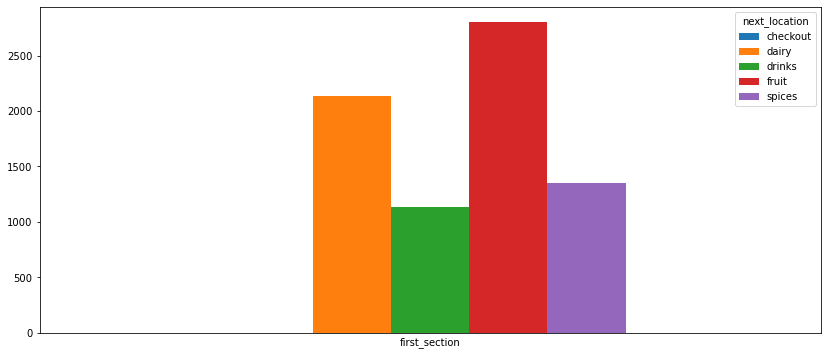

In [20]:
ax_first = location_first(df_path)

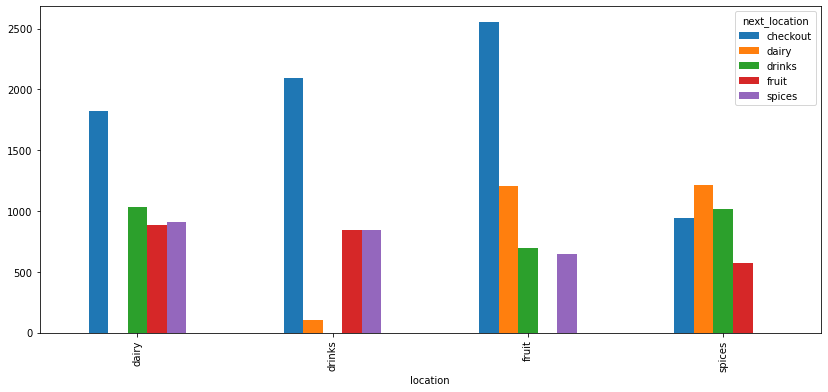

In [21]:
ax_next = location_next(df_path)

In [22]:
df_sim_path = modify_df(df_all_sim)

Text(0.5, 1.0, 'Real data')

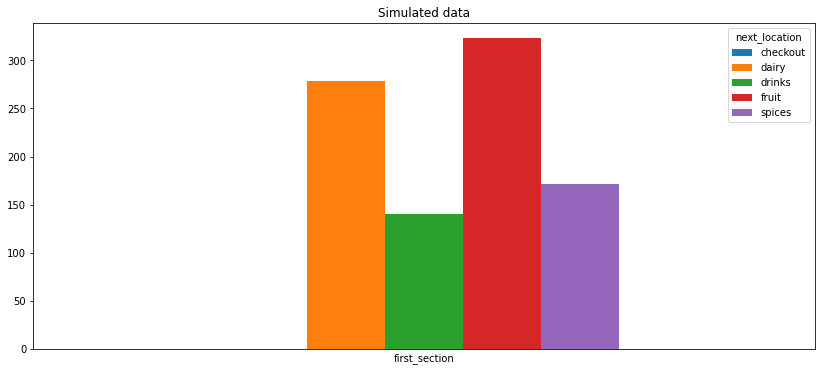

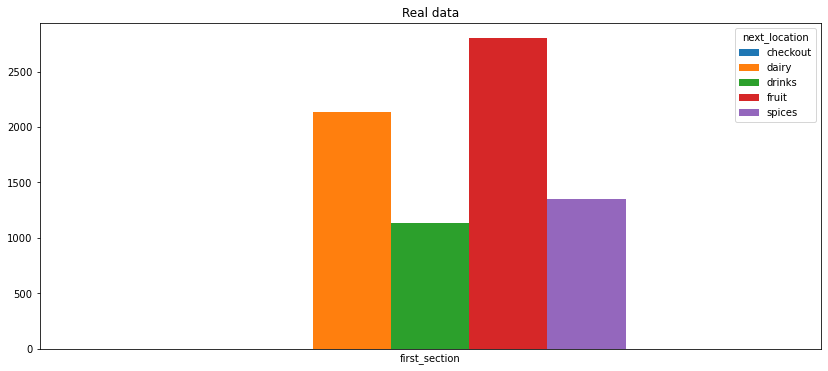

In [23]:
ax_sim_first = location_first(df_sim_path)
plt.title(label = 'Simulated data')
ax_first = location_first(df_path)
plt.title(label = 'Real data')

Text(0.5, 1.0, 'Real data')

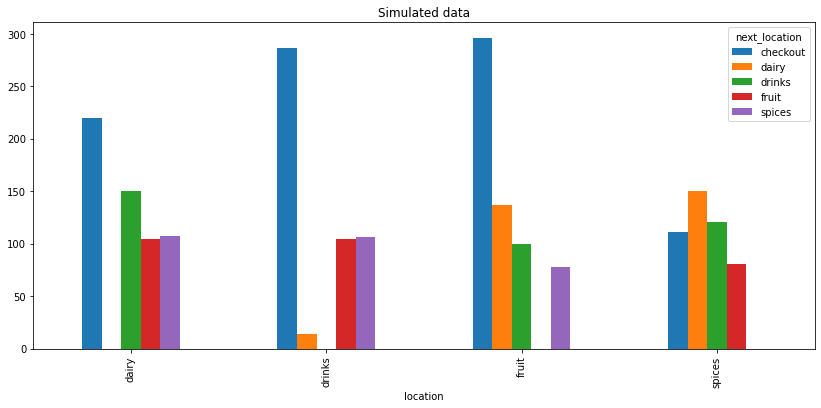

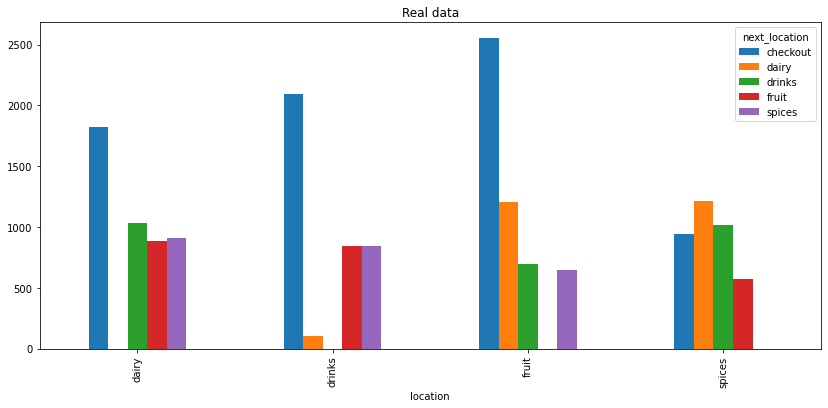

In [24]:
ax_sim_next = location_next(df_sim_path)
plt.title(label = 'Simulated data')
ax_next = location_next(df_path)
plt.title(label = 'Real data')

### Analyze the time spent in each section

In [25]:
df_dur = calculate_time_spent(df_all)
df_dur_sim = calculate_time_spent(df_all_sim)

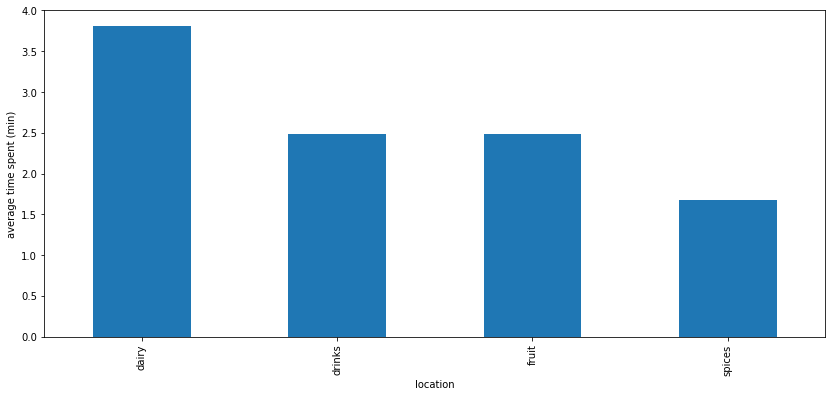

In [26]:
ax_dur = plot_time_spent(df_dur)

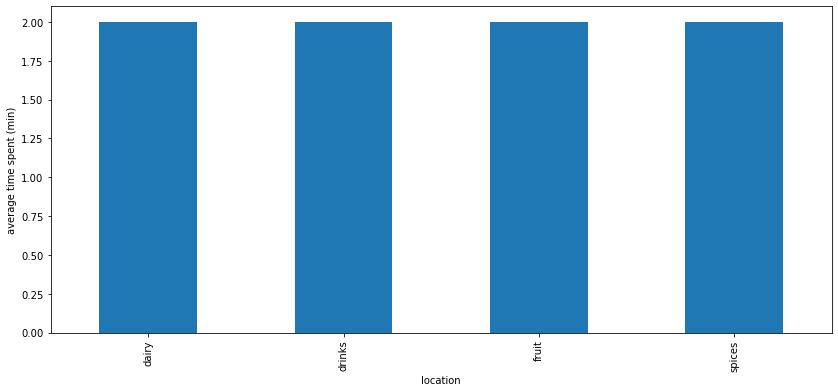

In [27]:
ax_dur_sim = plot_time_spent(df_dur_sim)

### `Compare the two simulations: df_sim is customer range goven manually. df_sim5 is for customer renage calculated based on the probability matrix`

 - ideally the matrix is better. however, the matrix calcaulation should be improved.

In [28]:
df_names = ['customer_simulation_time']
df_sim5 = read_csv(df_names)
df_all_sim5= customer_probs_matrix.clean_data(df_sim5)
df_all_sim5

,customer_no,location,shopping_day,customer_id,next_location
timestamp,,,,,
2022-05-04 07:01:00,1,drinks,cu,cu_1,spices
2022-05-04 07:02:00,1,spices,cu,cu_1,dairy
2022-05-04 07:03:00,1,dairy,cu,cu_1,spices
2022-05-04 07:04:00,1,spices,cu,cu_1,drinks
2022-05-04 07:05:00,1,drinks,cu,cu_1,checkout
...,...,...,...,...,...
2022-05-04 21:00:00,1392,checkout,cu,cu_1392,fruit
2022-05-04 20:58:00,1393,fruit,cu,cu_1393,checkout
2022-05-04 20:59:00,1393,checkout,cu,cu_1393,fruit


In [29]:
df_eda_sim5 = ave_cus_locations(df_all_sim5)

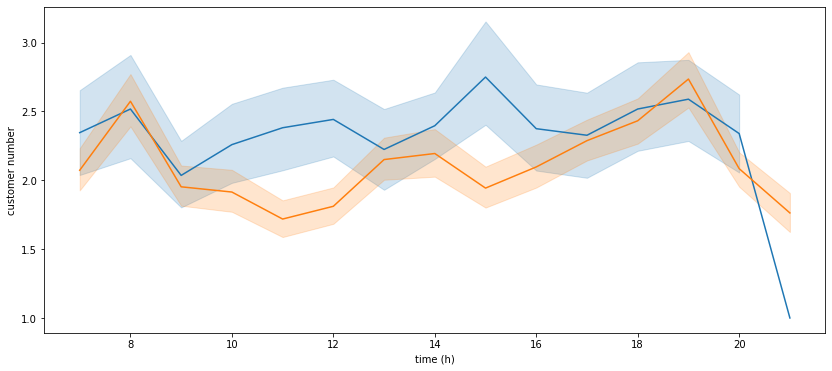

In [30]:
ax_checkout_sim5 = cus_checkout(df_eda_sim5)
ax_checkout = cus_checkout(df_eda)

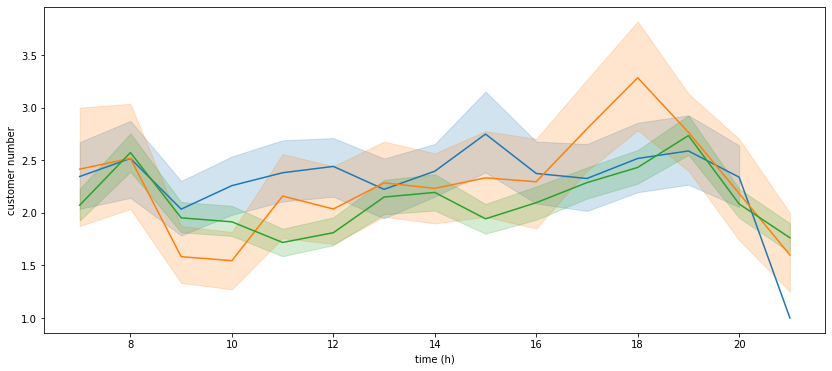

In [31]:
ax_checkout_sim5 = cus_checkout(df_eda_sim5) #blue with time_probabilty_matrix
ax_checkout_sim = cus_checkout(df_eda_sim) #orange with time change added manually
ax_checkout = cus_checkout(df_eda) #green real data